In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 155653 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

In [2]:
from google.colab import drive
drive.mount('/content/drive')
videopath = 'drive/MyDrive/CACM/Youtube/down.mp4'

Mounted at /content/drive


In [43]:
def download_youtube(youtube_id ='0', start_time=0, duration=5):
  !rm -rf clip*.mp4
  !rm -rf openpose/output/*
  # # download the youtube with the given ID
  # !youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$youtube_id
  # just pick a section where sign language is done
  !ffmpeg -y -loglevel info -ss $start_time -t $duration -i WAVING_2HANDS.mp4 clip.mp4
  # # detect poses on the these 10 seconds
  !rm openpose.avi
  # !cd openpose && ./build/examples/openpose/openpose.bin --face --hand --video ../clip.mp4 --write_json ./output_json/ --display 0  --write_video ../clip_openpose.avi
  !cd openpose && ./build/examples/openpose/openpose.bin --video ../clip.mp4 --write_json ./output_json/ --display 0  --write_video ../clip_openpose.avi
  # convert the result into MP4
  !ffmpeg -y -loglevel info -i clip_openpose.avi clip_openpose.mp4

download_youtube()

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [44]:
!rm openpose/images/video_out*.png
!mkdir openpose/output_images/
!cd openpose && ffmpeg -ss 0 -t 5 -i ../WAVING_2HANDS.mp4 ./output_images/out%05d.png -vf fps=30

rm: cannot remove 'openpose/images/video_out*.png': No such file or directory
mkdir: cannot create directory ‘openpose/output_images/’: File exists
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enab

In [45]:

import os


dir = "/content/openpose/output_images"
im_names = []
wildcard = ".png"
exts = wildcard.split(" ")
files = os.listdir(dir)
for name in files:
    fullname = os.path.join(dir, name)
    for ext in exts:
        if (name.endswith(ext)):
 
            a=name.rstrip('.png')
            b=a.lstrip('out')
            b=int(b)
            if b%2==1 or b%4==0 or b == 2 or b == 6 or b == 10 or b == 142 or b== 146 or b==150:

              os.remove(os.path.join(dir, name))
            else:
                break




In [46]:

import os


dir = "/content/openpose/output_json"
im_names = []
wildcard = ".json"
exts = wildcard.split(" ")
files = os.listdir(dir)
for name in files:
    fullname = os.path.join(dir, name)
    for ext in exts:
        if (name.endswith(ext)):
 
            a=name.rstrip('_keypoints.json')
            b=a.lstrip('clip_')
            b=int(b)
            if b%2==1 or b%4==0 or b == 2 or b == 6 or b == 10 or b == 142 or b== 146 or b==150:

              os.remove(os.path.join(dir, name))
            else:
                break

In [47]:
# import os

# def del_files(test_path, set_num):

#     num = 0
#     for root, dirs, files in os.walk(test_path):
#         files_size = len(files)
#         for name in files:
#             if name.endswith(".png"):

#               if (num < files_size - set_num):
                
#                 os.remove(os.path.join(test_path, name))
#                 num += 1
#               else:
#                     break


# if __name__ == "__main__":
#     path = r"/content/openpose/output_images"
#     del_files(path, 32 )

In [48]:
import cv2
import glob
import json
import numpy as np
import os

from matplotlib import pyplot as plt

def load_images(path):
    path = os.path.join(path,'*')
    files = glob.glob(path)
    # We sort the images in alphabetical order to match them
    #  to the annotation files
    files.sort()

    X_raw = []
    for file in files:
        image = cv2.imread(file)
        X_raw.append(np.array(image))

    return X_raw
        
def from_json(path):
    """
    save json data to path
    """
    file = open(path, 'r', encoding='utf-8')
    return json.load(file)

def extract_openpose_anns(ann_json):
  def extract_keypoints(ann_json):
    X = []
    Y = []
    C = []
    id = 0
    while id < len(ann_json):
      if ann_json[id] != 0:
        X.append(ann_json[id])
        Y.append(ann_json[id+1])
        C.append(ann_json[id+2])
        id += 3
      else:
        id += 1
  
    return np.array([X, Y, C])

  kp_pose = extract_keypoints(ann_json['people'][0]['pose_keypoints_2d'])
  kp_face = extract_keypoints(ann_json['people'][0]['face_keypoints_2d'])
  kp_hand_left = extract_keypoints(ann_json['people'][0]['hand_left_keypoints_2d'])
  kp_hand_right = extract_keypoints(ann_json['people'][0]['hand_right_keypoints_2d'])

  pose = {}
  pose['pose'] = kp_pose
  pose['face'] = kp_face
  pose['hand_left'] = kp_hand_left
  pose['hand_right'] = kp_hand_right

  return pose

def extract_pose_annotations(path):
  path = os.path.join(path,'*')
  files = glob.glob(path)
  files.sort()

  Y_raw = []
  for file in files:
    ann_json = from_json(file)
    ann = extract_openpose_anns(ann_json)
    Y_raw.append(ann)

  return Y_raw

In [49]:
X_raw = load_images("openpose/output_images/")
print(len(X_raw))
Y_raw = extract_pose_annotations("openpose/output_json/")
print(len(Y_raw))

32
32


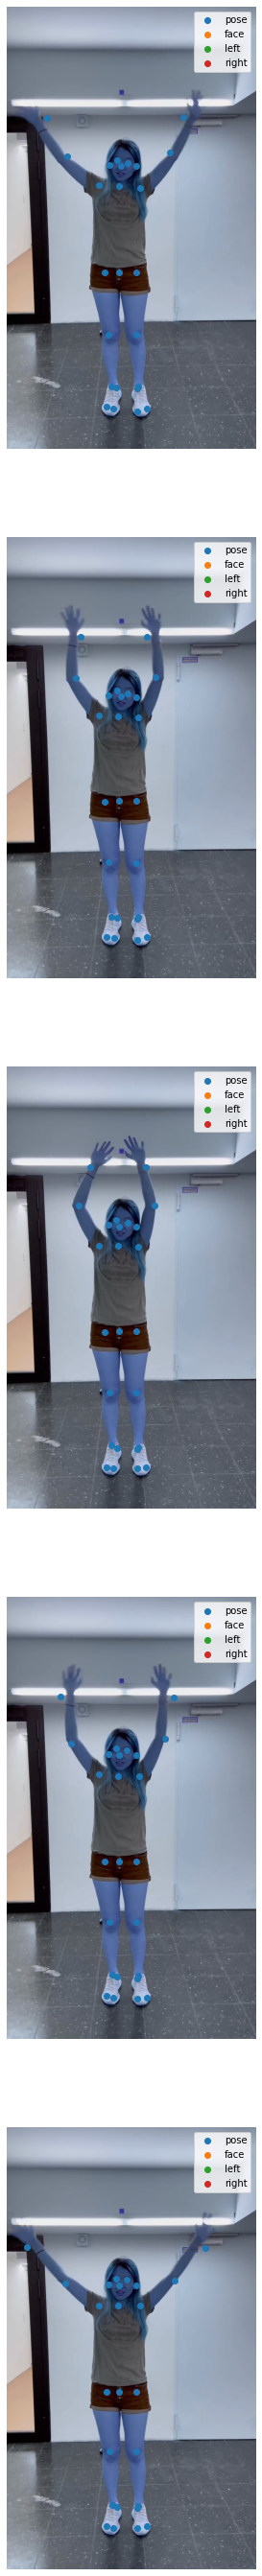

In [50]:
import matplotlib.pyplot as plt

def plot_pose(X, Y, start_id=0, end_id=10):
  # fig, ax = plt.subplots()
  fig = plt.figure(figsize=(100, 100))

  for id in range(start_id, end_id):
    x = X[id]
    y = Y[id]

    ax = fig.add_subplot(10, 1, id - start_id + 1)
    plt.axis('off')

    ax.imshow(x)

    ax.scatter(y['pose'][0], y['pose'][1], label='pose')
    ax.scatter(y['face'][0], y['face'][1], label='face')
    ax.scatter(y['hand_left'][0], y['hand_left'][1], label='left')
    ax.scatter(y['hand_right'][0], y['hand_right'][1], label='right')
    ax.legend()

  # ax.invert_yaxis()

plot_pose(X_raw, Y_raw, start_id=5, end_id=10)

In [16]:
!pip install tf_pose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [42]:
import tf_pose

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2022-07-20 18:51:41,495] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.7/dist-packages/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
INFO:TfPoseEstimator:loading graph from /usr/local/lib/python3.7/dist-packages/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

In [18]:
humans = e.inference(X_raw[12], resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
image_openpose = TfPoseEstimator.draw_humans(X_raw[12], humans, imgcopy=False)

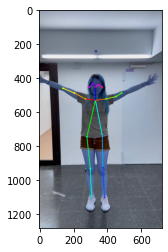

In [19]:
plt.imshow(image_openpose)

In [20]:
humans

[BodyPart:0-(0.46, 0.35) score=0.84 BodyPart:1-(0.46, 0.41) score=0.68 BodyPart:2-(0.38, 0.41) score=0.59 BodyPart:3-(0.29, 0.38) score=0.52 BodyPart:4-(0.19, 0.36) score=0.35 BodyPart:5-(0.54, 0.41) score=0.56 BodyPart:6-(0.62, 0.40) score=0.35 BodyPart:7-(0.67, 0.38) score=0.19 BodyPart:8-(0.39, 0.58) score=0.57 BodyPart:9-(0.42, 0.73) score=0.76 BodyPart:10-(0.43, 0.86) score=0.69 BodyPart:11-(0.51, 0.58) score=0.56 BodyPart:12-(0.52, 0.72) score=0.67 BodyPart:13-(0.53, 0.86) score=0.71 BodyPart:14-(0.44, 0.34) score=0.83 BodyPart:15-(0.48, 0.34) score=0.77 BodyPart:16-(0.41, 0.35) score=0.63 BodyPart:17-(0.51, 0.35) score=0.76]

In [23]:
import re
import numpy as np
from collections import Counter 
humans_frames = np.zeros([32,36])
confidence_frames = np.zeros([32,18])
for i in range(32):
  humans = e.inference(X_raw[i], resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
  # image_openpose = TfPoseEstimator.draw_humans(X_raw[i], humans, imgcopy=False)
  str_ = str(humans)

  print(str_)
  


  str_float_part = re.compile(r'[(](.*?)[)]', re.S)  
  str_float_find = re.findall(str_float_part, str_)
  # print('1',str_float_find)
  float_value_list_string = ",".join(str_float_find)
  float_value_list = re.findall(r"\d+\.?\d*",float_value_list_string)
  # print('3',score_list)
  float_value=list(np.float_(float_value_list))
  # print(float_value)

  str_int_part = re.compile(r'(?<=BodyPart:)\d+\.?\d*')
  str_int_find = re.findall(str_int_part, str_)
  int_value_list_string = ",".join(str_int_find)
  int_value_list = re.findall(r"\d+",int_value_list_string)
  int_value=list(np.int_(int_value_list))
  int_value_dict = dict(Counter(int_value))
  value = [key for key,value in int_value_dict.items()if value > 1]
  print('value',value)

  
  repeat_part_location =[]
  target=value
  for j in range(len(target)):
      result = target[j]
      for index, nums in enumerate(int_value):
          if nums == result:
              repeat_part_location.append(index)
  print('repeat_part_location',repeat_part_location)
  print('int_value',int_value)

  str_score_part = re.compile(r'(?<=score=)\d+\.?\d*')
  str_score_find = re.findall(str_score_part, str_)
  print('1',str_score_find)
  score_value_list_string = ",".join(str_score_find)
  score_value_list = re.findall(r"\d+\.?\d*",score_value_list_string)

  score_value=list(np.float_(score_value_list))
  print('score_value',score_value)

  for jjj in np.arange(0,len(repeat_part_location),2):
      repeat_part1 = repeat_part_location[jjj]
      repeat_part2 = repeat_part_location[jjj+1]
      print('repeat1',repeat_part1)
      if score_value[repeat_part1] >= score_value[repeat_part2]:
        int_value[repeat_part2] = -100
        score_value[repeat_part2] = -100
        float_value[repeat_part2*2]= -100
        float_value[repeat_part2*2+1]=-100
      else:
         float_value[repeat_part1*2] = float_value[repeat_part2*2]
         float_value[repeat_part1*2+1] = float_value[repeat_part2*2+1]
         int_value[repeat_part1] = -100
         score_value[repeat_part1] = -100
         float_value[repeat_part1*2]=-100
         float_value[repeat_part1*2+1]=-100

  while -100 in float_value:
    float_value.remove(-100)
  
  while -100 in score_value:
    score_value.remove(-100)
  
  while -100 in int_value:
    int_value.remove(-100)
  
  int_value_resort=np.argsort(int_value)
  # print('int_value2222',int_value)
  # print('score_value2222',score_value)
  # print('int_value_resort2222',int_value_resort)



  score_value= np.array(score_value)[int_value_resort.astype(int)]
  length = len(float_value)
  float_value[::2]= np.array(float_value)[2*int_value_resort.astype(int)]
  float_value[1:length:2]= np.array(float_value)[2*int_value_resort.astype(int)+1]
  int_value= np.array(int_value)[int_value_resort.astype(int)]

  # float_value[2*int_value_resort]
  # float_value[2*int_value_resort+1]
  # int_value[int_value_resort]
  # for iij in range(len(int_value_resort)):
  #     result = int_value_resort[iij]
  #     float_value[2*iij]=float_value[2*result]
  #     float_value[2*iij+1]=float_value[2*result+1]
  #     score_value[iij]=score_value[result]#
  #     int_value[iij]=int_value[result]


  zerotosev = np.arange(18) 
  diff_list = list(set(zerotosev) - set(int_value))
  print(diff_list)
  for iii in range(len(diff_list)):
      result = diff_list[iii]
      float_value.insert(2*result,0.0)
      float_value.insert(2*result+1,0.0)  
  print(float_value)
  print(len(float_value))

  





  for j in range(len(diff_list)):
      result = diff_list[j]
      if j == 0:
        score_value = score_value.tolist()
      score_value.insert(result,0.0)
  print('int_value2222',int_value)
  print('score_value2222',score_value)
  humans_frames[i,:] = float_value 
  confidence_frames[i,:] = score_value
  # print('confidence_frames',confidence_frames)

  

[BodyPart:0-(0.47, 0.36) score=0.88 BodyPart:1-(0.47, 0.42) score=0.73 BodyPart:2-(0.38, 0.42) score=0.60 BodyPart:3-(0.25, 0.39) score=0.52 BodyPart:4-(0.18, 0.37) score=0.13 BodyPart:5-(0.56, 0.42) score=0.46 BodyPart:6-(0.66, 0.40) score=0.37 BodyPart:7-(0.71, 0.39) score=0.17 BodyPart:8-(0.40, 0.59) score=0.55 BodyPart:9-(0.43, 0.74) score=0.65 BodyPart:10-(0.44, 0.86) score=0.68 BodyPart:11-(0.53, 0.58) score=0.56 BodyPart:12-(0.53, 0.74) score=0.73 BodyPart:13-(0.54, 0.87) score=0.65 BodyPart:14-(0.44, 0.35) score=0.79 BodyPart:15-(0.49, 0.35) score=0.81 BodyPart:16-(0.42, 0.36) score=0.54 BodyPart:17-(0.52, 0.36) score=0.75]
value []
repeat_part_location []
int_value [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
1 ['0.88', '0.73', '0.60', '0.52', '0.13', '0.46', '0.37', '0.17', '0.55', '0.65', '0.68', '0.56', '0.73', '0.65', '0.79', '0.81', '0.54', '0.75']
score_value [0.88, 0.73, 0.6, 0.52, 0.13, 0.46, 0.37, 0.17, 0.55, 0.65, 0.68, 0.56, 0.73, 0.65, 0.79, 0.81,

In [25]:
humans_frames.shape

(32, 36)

In [ ]:
confidence_frames

array([[0.38, 0.64, 0.56, ..., 0.62, 0.18, 0.59],
       [0.4 , 0.58, 0.48, ..., 0.65, 0.13, 0.6 ],
       [0.42, 0.6 , 0.51, ..., 0.65, 0.  , 0.6 ],
       ...,
       [0.65, 0.44, 0.18, ..., 0.81, 0.  , 0.58],
       [0.66, 0.33, 0.1 , ..., 0.82, 0.  , 0.6 ],
       [0.65, 0.35, 0.15, ..., 0.81, 0.  , 0.59]])

In [26]:
humans_frames[12]

array([0.46, 0.35, 0.44, 0.42, 0.38, 0.42, 0.3 , 0.39, 0.26, 0.38, 0.53,
       0.42, 0.61, 0.41, 0.  , 0.  , 0.4 , 0.59, 0.42, 0.73, 0.43, 0.85,
       0.51, 0.58, 0.52, 0.73, 0.53, 0.85, 0.44, 0.35, 0.48, 0.35, 0.41,
       0.36, 0.51, 0.36])